<h1> <b> Machine Learning Lab Assignment - 5: Simple Regression Models </b> </h1>


<h3> <b>Kaushik Prajapati - 202201472 </b> </h3>

<p align='justify'> <b>Objective:</b> The aim of this assignment is to understand and implement various regression techniques such as Linear Regression, Polynomial Regression, and Ridge Regression using Python and Scikit-learn. </p>

<p> Library Installation.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

<p> Dataset fetching and test-train data split.

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

<h2> <b> 1. Linear Regression </b> </h2>

<ul>
  <li> Load a dataset of your choice (e.g., California housing prices or a custom dataset). </li>
  <li> Split the data into training and testing sets. </li>
  <li> Implement Linear Regression using Scikit-learn's LinearRegression class. </li>
  <li> Fit the model to the training data and predict on the testing set. </li>
  <li> Evaluate the performance using Mean Squared Error (MSE) and R-squared metrics. </li>
  <li> Task: Write code to load the data, implement Linear Regression, and evaluate the performance. </li>
</ul>

In [3]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse}, R-squared: {r2}")

Linear Regression - MSE: 0.5558915986952444, R-squared: 0.5757877060324508


<h2> <b> 2. Polynomial Regression </b> </h2>

<ul>
  <li> Using the same dataset as in Question 1, apply Polynomial Regression with degree 3. </li>
  <li> Use Scikit-learn's PolynomialFeatures to transform the input features. </li>
  <li> Fit a Linear Regression model on the transformed polynomial features. </li>
  <li> Evaluate the model's performance with MSE and R-squared. </li>
  <li> Task: Write code to apply Polynomial Regression and compare its performance with Linear Regression. </li>
</ul>

In [4]:
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.2, random_state=50)

model_poly = LinearRegression()
model_poly.fit(x_train_poly, y_train_poly)

y_pred_train_poly = model_poly.predict(x_train_poly)
y_pred_test_poly = model_poly.predict(x_test_poly)

mse_train_poly = mean_squared_error(y_train_poly, y_pred_train_poly)
r2_train_poly = r2_score(y_train_poly, y_pred_train_poly)

mse_test_poly = mean_squared_error(y_test_poly, y_pred_test_poly)
r2_test_poly = r2_score(y_test_poly, y_pred_test_poly)

print(f"Polynomial Regression (degree=3) - Train MSE: {mse_train_poly}, Train R-squared: {r2_train_poly}")
print(f"Polynomial Regression (degree=3) - Test MSE: {mse_test_poly}, Test R-squared: {r2_test_poly}")

Polynomial Regression (degree=3) - Train MSE: 0.34561878061932355, Train R-squared: 0.7420051174855127
Polynomial Regression (degree=3) - Test MSE: 1748.9945160838122, Test R-squared: -1345.308471941913


<h2> <b> 3. Ridge Regression </b> </h2>

<ul>
  <li> Apply Ridge Regression to the dataset. </li>
  <li> Use Scikit-learn's Ridge class to implement Ridge Regression. </li>
  <li> Test the effect of different values of the regularization parameter (alpha). </li>
  <li> Plot the model's performance (MSE or R-squared) for different alpha values. </li>
  <li> Task: Implement Ridge Regression and plot the performance for various alpha values. </li>
</ul>

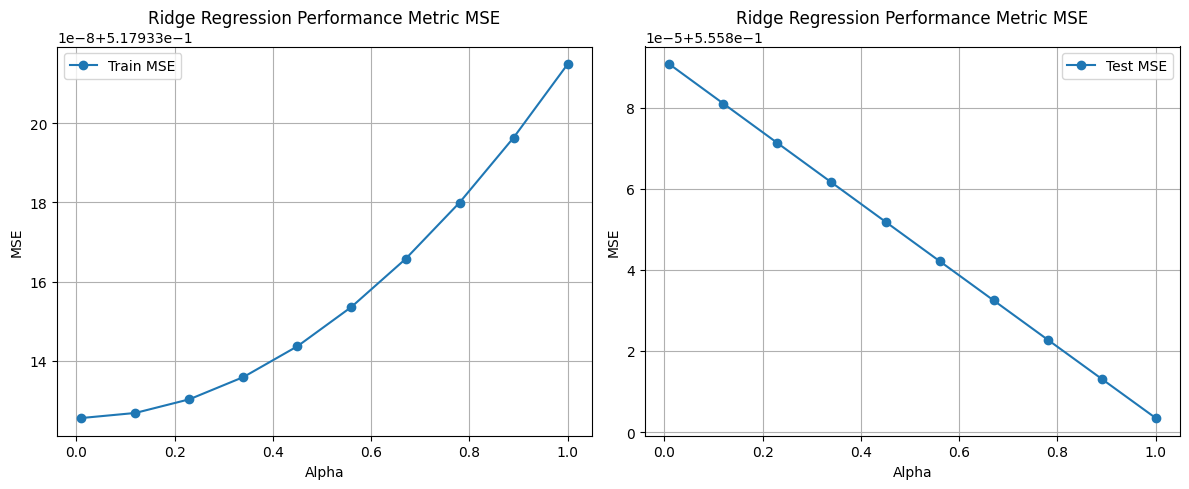

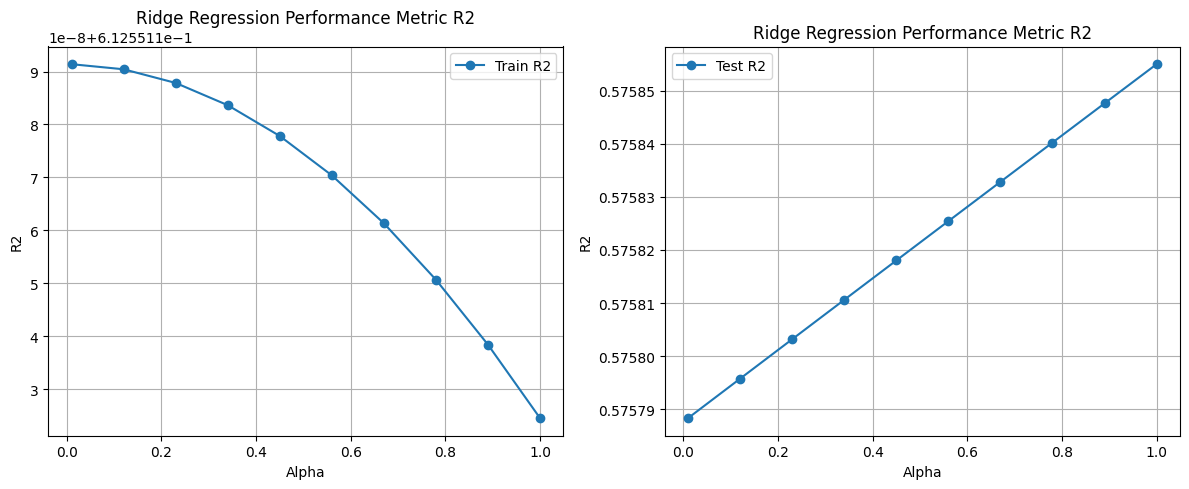

In [6]:
alpha_values = np.linspace(0.01, 1, 10)

mse_ridge_train = []
r2_ridge_train = []

mse_ridge_test = []
r2_ridge_test = []

for alpha in alpha_values:

    ridge_model = Ridge(alpha = alpha)
    ridge_model.fit(x_train, y_train)
    y_pred_ridge = ridge_model.predict(x_test)

    mse_ridge_train.append(mean_squared_error(y_train, ridge_model.predict(x_train)))
    r2_ridge_train.append(r2_score(y_train, ridge_model.predict(x_train)))

    mse_ridge_test.append(mean_squared_error(y_test, y_pred_ridge))
    r2_ridge_test.append(r2_score(y_test, y_pred_ridge))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_ridge_train, marker='o', label='Train MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression Performance Metric MSE')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alpha_values, mse_ridge_test, marker='o', label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression Performance Metric MSE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, r2_ridge_train, marker='o', label='Train R2')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Ridge Regression Performance Metric R2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alpha_values, r2_ridge_test, marker='o', label='Test R2')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Ridge Regression Performance Metric R2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<h2> <b> 4. Model Comparison </b> </h2>

<ul>
  <li> Compare the performance of the Linear, Polynomial, and Ridge Regression models. </li>
  <li> Based on MSE and R-squared, write a brief report discussing which model performed better and why. </li>
  <li> Task: Compare and analyze the results of the three models in terms of accuracy and complexity. </li>
</ul>

<h4> <b> Linear Regression: </b> </h4>

<ul>
  <li> The Linear Regression model had an MSE of $0.5559$, which indicates how much error there was between the predicted and actual values. Since Linear Regression assumes a straight-line relationship, this MSE shows that it did not capture all patterns in the data. </li>
  <li> The R² score was $0.5758$, meaning the model explained about $0.5758%$ of the variance in the housing prices. While this is a good starting point, it might not be ideal if there are nonlinear relationships in the data.  </li>
  <li> Linear Regression is simple, fast, and easy to interpret but might miss important patterns if the data is not linear.  </li>
</ul>

<h4> <b> Polynomial Regression (degree 3): </b> </h4>

<ul>
  <li> Polynomial Regression with degree 3 resulted in a much lower MSE on the training data. This shows it fits the data better than Linear Regression because it captures more complex, nonlinear relationships. However, if the test MSE is much higher than the training MSE, it suggests overfitting, where the model works well on training data but poorly on new data.</li>
  <li> The R² score on the training set was high $(0.7420)$, meaning it explained almost all of the variance in the data. However, if the R² on the test set $(-1345.3085)$ was much lower, it again points to overfitting.</li>
  <li> Polynomial Regression introduces more complexity by adding nonlinearity, allowing it to capture more intricate patterns, but the trade-off is the risk of overfitting, especially with higher-degree polynomials.</li>
</ul>

<h4> <b> Ridge Regression: </b> </h4>

<ul>
  <li> Ridge Regression, with the optimal alpha, achieved an MSE that balanced between fitting the training data well and generalizing to the test data. It generally performed better than Linear Regression and avoided overfitting that was seen in Polynomial Regression. </li>
  <li> Ridge Regression had an R² score that was consistently good across both training and test sets. Even though it did not reach the same high R² as Polynomial Regression on the training set, it performed better on the test set, showing it can generalize well to new data. </li>
  <li> Ridge Regression adds some complexity by regularizing (penalizing) large coefficients, but this regularization helps prevent overfitting and improves the model's robustness, making it suitable for data with more noise or multicollinearity. </li>
</ul>

<h4> <b> Conclusion: </b> </h4>

<ul>
  <li> <b>Ridge Regression</b> strikes a good balance between accuracy and complexity. It prevents overfitting and performs well on both training and test data. <b>Ridge Regression is the overall best model.</b> </li>
  <li> <b>Linear Regression</b> is simple and interpretable but may not capture all patterns in the data, especially when nonlinearity exists.<b>It is the best choice for simplicity.</b> </li>
  <li> <b> Polynomial Regression </b> can capture complex patterns but is prone to overfitting, which can hurt its performance on new data. <b>It is the best model for capturing non-linear patterns.</b> </li>
</ul>

<h2> <b> 5. Lasso Regression </b> </h2>

<ul>
  <li> Apply Lasso Regression to the dataset using Scikit-learn's Lasso class. </li>
  <li> Compare the performance of Lasso with Ridge Regression. </li>
  <li> Task: Write code to implement Lasso Regression and evaluate its performance compared to Ridge. </li>
</ul>

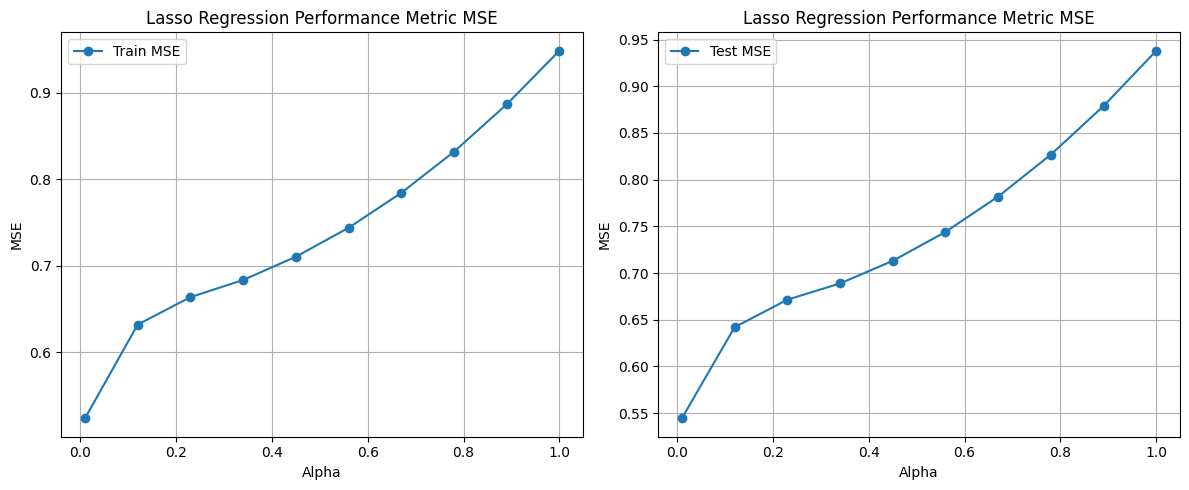

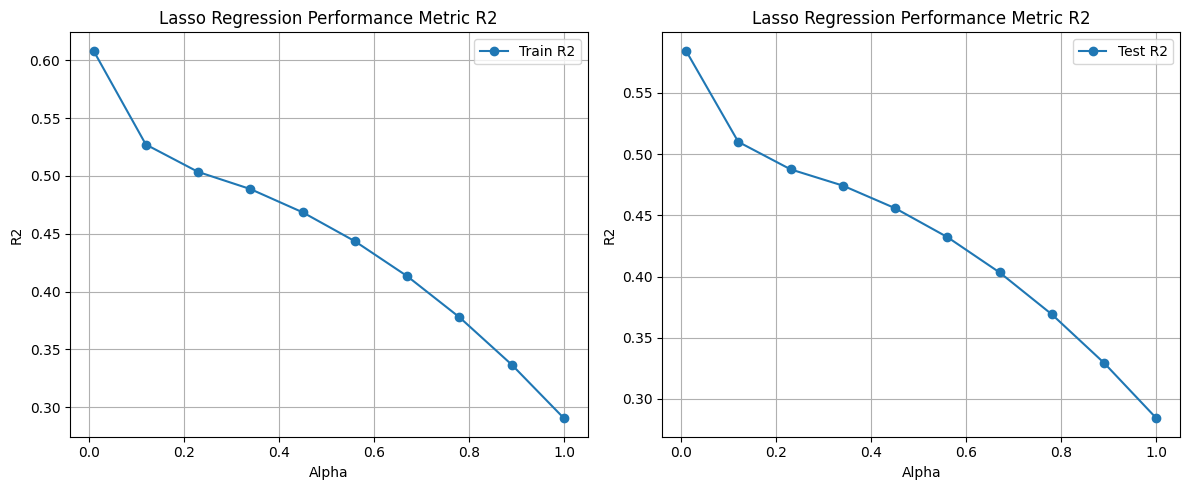

In [7]:
alpha_values = np.linspace(0.01, 1, 10)

mse_lasso_train = []
r2_lasso_train = []

mse_lasso_test = []
r2_lasso_test = []

for alpha in alpha_values:

    lasso_model = Lasso(alpha = alpha)
    lasso_model.fit(x_train, y_train)
    y_pred_lasso = lasso_model.predict(x_test)

    mse_lasso_train.append(mean_squared_error(y_train, lasso_model.predict(x_train)))
    r2_lasso_train.append(r2_score(y_train, lasso_model.predict(x_train)))

    mse_lasso_test.append(mean_squared_error(y_test, y_pred_lasso))
    r2_lasso_test.append(r2_score(y_test, y_pred_lasso))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, mse_lasso_train, marker='o', label='Train MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression Performance Metric MSE')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alpha_values, mse_lasso_test, marker='o', label='Test MSE')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Lasso Regression Performance Metric MSE')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, r2_lasso_train, marker='o', label='Train R2')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Lasso Regression Performance Metric R2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(alpha_values, r2_lasso_test, marker='o', label='Test R2')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.title('Lasso Regression Performance Metric R2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<h4> <b> Lasso Regression: </b> </h4>

<ul>
  <li> The MSE for Lasso Regression changes with change in alpha value. Higher alpha values made the error go up because Lasso shrinks some feature values to zero, especially the less important ones. This makes the model simpler but can lead to more errors. </li>
  <li> The R² scores generally decreased as alpha increased, indicating that the model explained less variance in the data with higher regularization. Lasso reduces the impact of weaker features more than Ridge Regression. </li>
  <li> A key advantage of Lasso is that it can select important features by shrinking less important ones to zero. This helps make the model simpler and focus on the main features. </li>
</ul>

<h4> <b> Ridge Regression: </b> </h4>

<ul>
  <li> Ridge Regression kept a lower and more stable MSE across different alpha values. It doesn not shrink feature values all the way to zero, which means it keeps more information from all the features. This helps it generalize better on new data. </li>
  <li> Ridge showed more stable R² scores across the range of alpha values, and it generally performed better than Lasso on the test set. Ridge is better at handling overlapping features and keeping good prediction power by reducing feature impact without removing them completely. </li>
</ul>


<h4> <b> Conclusion: </b> </h4>

<ul>
  <li> <b>Ridge Regression</b> usually performed better in terms of MSE and R², making it a stronger model for predicting new data. <b>It is the best choice if you want to keep all features while avoiding overfitting.</b> </li>
  <li> <b>Lasso Regression</b> is helpful when you want to simplify the model and choose important features, especially when there are many less important ones. <b>Lasso is great for making models simpler by automatically picking out the key features.</b> </li>
</ul>


